# Jai Patel 

## Research question/interests
e.

## I am intersted in looking at how the amount of turns in a game and piece colour is reletive to the probability winning a chess match.


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark",)
pd.options.mode.chained_assignment = None

In [98]:
pd.read_csv("chess_games.csv")
df1=pd.read_csv("chess_games.csv")
df1.head()
df1.columns

Index(['game_id', 'rated', 'turns', 'victory_status', 'winner',
       'time_increment', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_code', 'opening_moves',
       'opening_fullname', 'opening_shortname', 'opening_response',
       'opening_variation'],
      dtype='object')

## My interest includes winner and turns so I will focus on those rows

In [121]:
df2 = df1[['turns', 'winner']]
hi3 = df2.describe();
hi3

,turns
count,20058.000000
mean,60.465999
std,33.570585
min,1.000000
25%,37.000000
50%,55.000000
75%,79.000000
max,349.000000


In [122]:
df2['winner'].value_counts()

White    10001
Black     9107
Draw       950
Name: winner, dtype: int64

In [123]:
 df2.drop(df2.index[df2['winner'] == 'Draw'], inplace = True)
df2['winner'].value_counts()

White    10001
Black     9107
Name: winner, dtype: int64

,turns
count,19090.000000
mean,59.243531
std,32.275770
min,2.000000
25%,37.000000
50%,54.000000
75%,77.000000
max,349.000000


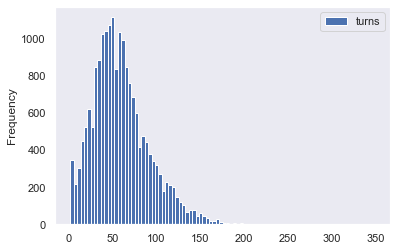

In [140]:
df2.plot(kind='hist',bins = int(90),)
desc = df2.describe()
desc


## The graph and table show the mean amount of turns it takes reguardless of piece colour but there are a few outliers which can make the mean number of turns more accurate such as eliminating the 0-1 turn wins as there is no possible way to checkmate within 1 turn or below and also to eliminate the wins which are more than about 150 turns as they are very rare cases and regular games do not last that long. 

<AxesSubplot:>

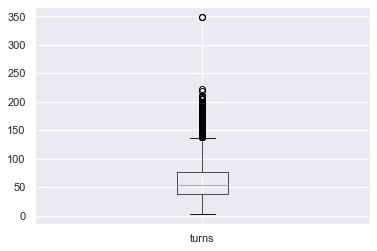

In [125]:
df5 = df2
df5.drop(df5.index[df5['turns'] < 2], inplace = True)
df5.boxplot()

## This boxplot shows how the wins over about 140 turns are outliers which must be removed from the dataset.

In [141]:
df5.drop(df5.index[df5['turns'] > 140], inplace = True)
desc1 = df5.describe()
desc1

,turns
count,18708.000000
mean,57.224289
std,29.166168
min,2.000000
25%,36.000000
50%,54.000000
75%,75.000000
max,140.000000


## This table shows a more accurate mean value as the most amount of turns is 140 and least is 2 which shows that the average amount of turns it takes to win is about 57. 

In [142]:
def load_data(link, colour="both"):
    '''Enter either Black, White or Both or All in lowercase to see statistics on selected colour'''
    df1=pd.read_csv(link)
    df2 = df1[['turns', 'winner']]
    df2.drop(df2.index[df2['turns'] < 2], inplace = True)
    df2.drop(df2.index[df2['turns'] > 140], inplace = True)
    if(colour=="black"):
        black = ['Black']
        blackWon=df2[df2['winner'].isin(black)]
        return blackWon
    elif (colour=="white"):
        white = ['White']
        whiteWon= df2[df2['winner'].isin(white)]
        return whiteWon
    elif (colour=="both"):
        
        return df2
    elif(colour == "all"):
        return df2
    else:
       print("please add in a black, white or both colour choice")

,turns
count,9798.000000
mean,55.979588
std,29.128644
min,2.000000
25%,35.000000
50%,53.000000
75%,73.000000
max,140.000000


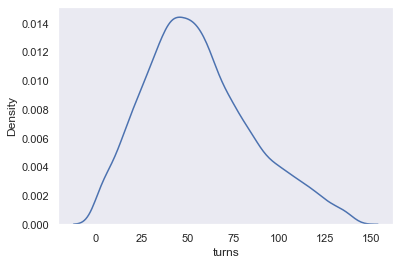

In [143]:
sns.kdeplot(load_data("chess_games.csv","white")['turns'])
desc2 = load_data("chess_games.csv","white").describe()
desc2

,turns
count,8910.000000
mean,58.593042
std,29.147706
min,2.000000
25%,38.000000
50%,56.000000
75%,76.000000
max,140.000000


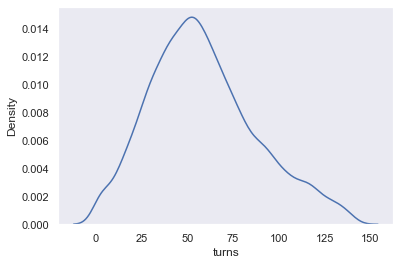

In [144]:
sns.kdeplot(load_data("chess_games.csv","black")['turns'])
desc3 = load_data("chess_games.csv","black").describe()
desc3

## The count on the tables show how white has more games won in total but the similarities between the graphs show how on average the colour of peice does not matter in terms of who wins as both black and white have very similar amount of average turns it takes to win which 

# Analysis

### Overall the data answered my research question of how amount of turns and colour of piece affect are relatove to winning a match.
### The data shows how the colour of piece does not affect the length of the match at all but white did win more times then black did in terms of raw wins
### The data also shows how the average win rate of all matches was around 57 and around that many turns is when one has the most probable chance to win